# 7 Machine learning data preparation

In this chapter we will be doing various operations on data in order to prepare it for our machine learning algorithms.

To get started, we have to import some packages which will help us in data preparation. These packages, or libraries as we call them, are:
- pandas, for working with tabular data
- numpy, for the mathematical operations
- sklearn, for the machine learning algorithms and other handy functions
- cv2 - for operating with images
- matplotlib - for displaying plots and graphs

In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm

We are loading the dataset and printing the first 5 rows to see which features it has. This is just to give us an idea of what we are working with.

In [2]:
dataset = pd.read_csv("sample_dataset.txt")
dataset.head()

,Full name,age,sex,height,school,average grade
0,Roberta Guzman,14,f,150,High school Charles,3.5
1,Christina Griffith,14,f,166,High school Charles,3.3
2,Harvey Aguilar,15,m,152,High school Charles,2.0
3,Vicky Mack,18,f,158,High school Charles,2.5
4,Kelley Freeman,18,f,167,High school Charles,4.5


We may perform some analysis on the dataset to see how many different high schools are mentioned in it.

In [3]:
nm_of_schools = len(dataset['school'].unique())
print(f"We have {nm_of_schools} schools present in the dataset, which are:")
for school in dataset['school'].unique():
    print(school)

We have 2 schools present in the dataset, which are:
High school Charles
High school Wimble


## Performing manual annotations on a simple data set (created in the classroom).

In this dataset there is information present for each student such as: his/her name, age, sex, their height in centimeters, which high school are they attending and their average grade (1 is lowest, 5 is the highest). Lets say for example we are a professor and want to have even more information from this dataset. In that case, one approach would be to add information if the student will pass or not according to their average grade. We can manually add another column in the dataset which will be called "Has passed" and will contain yes or no values, represented as ones and zeros respectfully.

In [4]:
dataset['has passed'] = np.empty(len(dataset), dtype=str)
dataset['has passed'] = np.where(dataset['average grade'] >= 3.5, 1, 0)

In [5]:
dataset.head()

,Full name,age,sex,height,school,average grade,has passed
0,Roberta Guzman,14,f,150,High school Charles,3.5,1
1,Christina Griffith,14,f,166,High school Charles,3.3,0
2,Harvey Aguilar,15,m,152,High school Charles,2.0,0
3,Vicky Mack,18,f,158,High school Charles,2.5,0
4,Kelley Freeman,18,f,167,High school Charles,4.5,1


Now we can see that our dataset has additionally a column named "has passed". We may add additional columns in the future depending on what we are asked to do.

## Experimenting with feature extraction

Feature extraction is the task of converting the features we already have in our dataset, into features that will be suitable for use by the machine learning algorithms. Since the algorithms are designed to better handle data which is in numerical format, our next stop in this feature extraction will be just that, to transform our data into something numerical.

Firstly we arrange our dataset into a python dictionary. We do this since the method that will convert our features into numerical features accepts dictionaries.

In [6]:
dataset_as_dictionary = []
for index, row in dataset.iterrows():
    row_dict = {}
    row_dict['Full name'] = row['Full name']
    row_dict['age'] = row['age']
    row_dict['sex'] = row['sex']
    row_dict['height'] = row['height']
    row_dict['school'] = row['school']
    row_dict['average grade'] = row['average grade']
    row_dict['has passed'] = row['has passed']
    dataset_as_dictionary.append(row_dict)

We use the **DictVectorizer** class of the sklearn library in order to achieve our goal of obtaining numerical features. We create an instance of that class and call the **fit_transform()** method that will analyze the data and convert it to numbers accordingly.

In [7]:
vect = DictVectorizer()
vect.fit_transform(dataset_as_dictionary).toarray()

array([[  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          1. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,  14. ,   3.5,
          1. , 150. ,   1. ,   0. ,   1. ,   0. ],
       [  0. ,   0. ,   1. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,  14. ,   3.3,
          0. , 166. ,   1. ,   0. ,   1. ,   0. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   1. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,  15. ,   2. ,
          0. , 152. ,   1. ,   0. ,   0. ,   1. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   1. ,   0. ,  18. ,   

We see that instead of having features in string representation, now they are transformed into a numerical representation.

## Dividing the data set in training and testing sets

An important step when making machine learning models is dividing the data into a training dataset and a testing dataset.
We do this because if we train and test the machine learning model on the same dataset, then the results will not tell us how well our model is going to perform when presented with new and unseen data. So the solution is dividing the dataset into a training and testing dataset. Like the name suggests, one will be used only in the training part of the model, while we get our metrics and make assumptions about the model when we run it on the testing dataset.

For our small dataset, it is possible to manually divide the dataset into a train and test dataset. But, when we will work with big datasets, this is going to become infeasible. We can use the helpful functionalities that the sklearn library gives us, namely the **train_test_split()** function to automatically split the dataset. Since machine learning models taka data as input and predict some target variable, we need to pass the same to the function.


In our scenario, we want to be able to predict if a student has a passing grade. The input that we will give to the machine learning model is going to be the students general information, disregarding their average grade. Here we again transform only the data that we need as input to the model into dictionaries which will be used for feature extraction.

In [8]:
# FOR X
x_data_as_dictionary = []
for index, row in dataset.iterrows():
    row_dict = {}
    row_dict['Full name'] = row['Full name']
    row_dict['age'] = row['age']
    row_dict['sex'] = row['sex']
    row_dict['height'] = row['height']
    row_dict['school'] = row['school']
    
    x_data_as_dictionary.append(row_dict)
    

As for the target variable, we don't have to do any feature extraction, we can just use it as is. Our target variable is the "has passed" column of our dataset.

In [9]:
vect = DictVectorizer()
x = vect.fit_transform(x_data_as_dictionary).toarray()
y = dataset.iloc[:, -1]

We split the dataset into 4 parts:
- x_train is the input to the model during training
- y_train is the target variable which will be used during training of the model

- x_test is the input to the model when we want to make a prediction, or compute how well our model is performing
- y_test is the target variable which we check to see if our model got right when it makes a prediction

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

We create an instance of the **Support Vector Machine** model with the help of the sklearn library. In the **fit()** function we pass to it the data it needs during training.

In [11]:
MLModel = svm.SVC()
MLModel.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

At the end we made a prediction about the data that we have in the testing dataset, each element representing if the student passed or not.

In [12]:
MLModel.predict(x_test)

array([1, 1, 0, 1, 1, 1, 1, 1, 0])

## Using augmentation of the data

Most common use case for data augmentation is in images. Some machine learning models are designed to take images as input. Images are represented as three dimensional arrays, one dimension being the width, second being the height and the third one is the color (red, green, blue). The values of the width and height arrays represent the pixel intensity of a specific color.

Some forms of data augmentation in images can be quite simple. For example:
- Flipping horizontally
- Flipping vertically
- Zooming
- Rotating
- Etc.

In the following example we will see how we can load a simple image and do some augmentation to it (flipping).

In [13]:
def visualize(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR) 
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    plt.imshow(img)

In [14]:
def visualize_flipped(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR) 
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    augmented_image = cv2.flip(img, 0)
    plt.imshow(augmented_image)


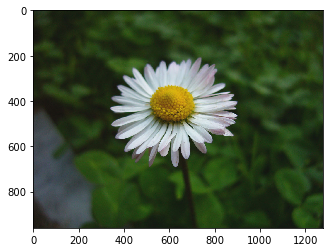

In [15]:
visualize('flower.jpg')

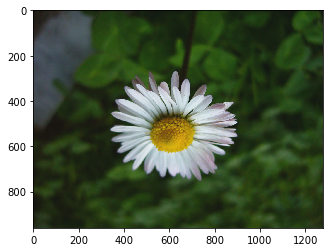

In [16]:
visualize_flipped('flower.jpg')